<img src="../src/packt-banner.png" alt="">

# Lesson 2: Predictive Analytics with Jupyter

In this workbook you will find:
- Techniques to prepare data for machine learning
- Recipes to train and evaluate classification models   

---

In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set plot appearance
# See here for more options: https://matplotlib.org/users/customizing.html

%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")
# sns.set_context("poster", font_scale=1.0)

# Ignore warnings (for seaborn's kdeplot)
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
%load_ext version_information
%version_information pandas, numpy, matplotlib, seaborn, sklearn

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.4.0
OS Darwin 16.7.0 x86_64 i386 64bit
pandas 0.23.0
numpy 1.14.3
matplotlib 2.2.2
seaborn 0.8.1
sklearn 0.19.1
Thu Oct 18 14:05:23 2018 CDT

---

## Topic A: Preparing to train a predictive model	

---

### Subtopic B: Preparing data for machine learning   

---

#### Merging data

In [3]:
pd.merge?

In [4]:
# Build a simple set of tables

df_1 = pd.DataFrame({'product': ['red shirt', 'red shirt', 'red shirt', 'white dress'],
                     'price': [49.33, 49.33, 32.49, 199.99]})
df_2 = pd.DataFrame({'product': ['red shirt', 'blue pants', 'white tuxedo', 'white dress'],
                     'in_stock': [True, True, False, False]})

In [5]:
df_1

,product,price
0,red shirt,49.33
1,red shirt,49.33
2,red shirt,32.49
3,white dress,199.99


In [6]:
df_2

,product,in_stock
0,red shirt,True
1,blue pants,True
2,white tuxedo,False
3,white dress,False


In [7]:
## Inner merge

df = pd.merge(left=df_1, right=df_2, on='product', how='inner')
df

,product,price,in_stock
0,red shirt,49.33,True
1,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False


In [8]:
# Outer merge

df = pd.merge(left=df_1, right=df_2, on='product', how='outer')
df

,product,price,in_stock
0,red shirt,49.33,True
1,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


---

#### De-duplicating

In [9]:
# Standard method

df.drop_duplicates()

,product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


In [10]:
# Using masks for more fine tuned control

df.duplicated()

0    False
1     True
2    False
3    False
4    False
5    False
dtype: bool

In [11]:
df.duplicated().sum()

1

In [12]:
df[df.duplicated()]

,product,price,in_stock
1,red shirt,49.33,True


In [13]:
df[~df.duplicated()]

,product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


In [14]:
df[~df['product'].duplicated()]

,product,price,in_stock
0,red shirt,49.33,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


In [15]:
# Let's overwrite the DataFrame using drop_duplicates

df.drop_duplicates(inplace=True)
df

,product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


---

#### Handling missing data

In [16]:
# Drop the incomplete rows

df.dropna()

,product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False


In [17]:
# Drop the incomplete columns

df.dropna(axis=1)

,product,in_stock
0,red shirt,True
2,red shirt,True
3,white dress,False
4,blue pants,True
5,white tuxedo,False


In [18]:
# DataFrame method for filling missing values

df.fillna?

In [19]:
df

,product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,NaN,True
5,white tuxedo,NaN,False


In [20]:
# Fill with the average

df.fillna(value=df.price.mean())

,product,price,in_stock
0,red shirt,49.330000,True
2,red shirt,32.490000,True
3,white dress,199.990000,False
4,blue pants,93.936667,True
5,white tuxedo,93.936667,False


In [21]:
# Fill with the previous value in that column

df.fillna(method='pad')

,product,price,in_stock
0,red shirt,49.33,True
2,red shirt,32.49,True
3,white dress,199.99,False
4,blue pants,199.99,True
5,white tuxedo,199.99,False


In [22]:
# Let's fill the data using the average

df = df.fillna(value=df.price.mean())

---

#### Building training data sets

In [23]:
# First, let's create a new column. This will allow
# us to explore more data transformation techniques

ratings = ['low', 'medium', 'high']
np.random.seed(2)
df['rating'] = np.random.choice(ratings, len(df))
df

,product,price,in_stock,rating
0,red shirt,49.330000,True,low
2,red shirt,32.490000,True,medium
3,white dress,199.990000,False,low
4,blue pants,93.936667,True,high
5,white tuxedo,93.936667,False,high


In [24]:
# Convert in_stock to binary

df.in_stock = df.in_stock.map({False: 0, True: 1})
df

,product,price,in_stock,rating
0,red shirt,49.330000,1,low
2,red shirt,32.490000,1,medium
3,white dress,199.990000,0,low
4,blue pants,93.936667,1,high
5,white tuxedo,93.936667,0,high


In [25]:
# Encode ordinal labels

from sklearn.preprocessing import LabelEncoder
rating_encoder = LabelEncoder()
df.rating = rating_encoder.fit_transform(df.rating)
df

,product,price,in_stock,rating
0,red shirt,49.330000,1,1
2,red shirt,32.490000,1,2
3,white dress,199.990000,0,1
4,blue pants,93.936667,1,0
5,white tuxedo,93.936667,0,0


In [26]:
# Convert back if needed

rating_encoder.inverse_transform(df.rating)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['low', 'medium', 'low', 'high', 'high'], dtype=object)

In [27]:
# Let's apply the backwards conversion and then try a different mapping technique

df.rating = rating_encoder.inverse_transform(df.rating)
df

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,product,price,in_stock,rating
0,red shirt,49.330000,1,low
2,red shirt,32.490000,1,medium
3,white dress,199.990000,0,low
4,blue pants,93.936667,1,high
5,white tuxedo,93.936667,0,high


In [28]:
# Encode the odrinal labels properly using a custom mapping

ordinal_map = {rating: index for index, rating in enumerate(['low', 'medium', 'high'])}
print(ordinal_map)
df.rating = df.rating.map(ordinal_map)
df

{'low': 0, 'medium': 1, 'high': 2}


,product,price,in_stock,rating
0,red shirt,49.330000,1,0
2,red shirt,32.490000,1,1
3,white dress,199.990000,0,0
4,blue pants,93.936667,1,2
5,white tuxedo,93.936667,0,2


In [29]:
# One-hot-encode the product feature

df = pd.get_dummies(df)
df

,price,in_stock,rating,product_blue pants,product_red shirt,product_white dress,product_white tuxedo
0,49.330000,1,0,0,1,0,0
2,32.490000,1,1,0,1,0,0
3,199.990000,0,0,0,0,1,0
4,93.936667,1,2,1,0,0,0
5,93.936667,0,2,0,0,0,1


In [30]:
# Split into training and testing sets

features = ['price', 'rating', 'product_blue pants',
            'product_red shirt', 'product_white dress',
            'product_white tuxedo']
X = df[features].values

target = 'in_stock'
y = df[target].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3)
    
print('         shape')
print('--------------')
print('X_train', X_train.shape)
print('X_test ', X_test.shape)
print('y_train', y_train.shape)
print('y_test ', y_test.shape)

         shape
--------------
X_train (3, 6)
X_test  (2, 6)
y_train (3,)
y_test  (2,)


---

### Activity A: Preparing to train a predictive model for the employee retention problem

---

In [31]:
%%bash
tail ../data/hr-analytics/hr_data.csv

0.43,0.57,2,159,3,1,yes,0,,technical,low
0.89,0.88,5,228,5,1,yes,0,,support,low
0.09,0.81,6,257,4,0,yes,0,,support,low
0.4,0.48,2,155,3,0,yes,0,,support,low
0.76,0.83,6,293,6,0,yes,0,,support,low
0.4,0.57,2,151,3,0,yes,0,,support,low
0.37,0.48,2,160,3,0,yes,0,,support,low
0.37,0.53,2,143,3,0,yes,0,,support,low
0.11,0.96,6,280,4,0,yes,0,,support,low
0.37,0.52,2,158,3,0,yes,0,,support,low

In [32]:
# Read the data

df = pd.read_csv('../data/hr-analytics/hr_data.csv')

In [33]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'is_smoker', 'department', 'salary'],
      dtype='object')

In [34]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
0,0.38,0.53,2,157.0,3.0,0,yes,0,NaN,sales,low
1,0.80,0.86,5,262.0,6.0,0,yes,0,yes,sales,medium
2,0.11,0.88,7,272.0,4.0,0,yes,0,NaN,sales,medium
3,0.72,0.87,5,223.0,5.0,0,yes,0,NaN,sales,low
4,0.37,0.52,2,NaN,NaN,0,yes,0,no,sales,low


In [35]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,is_smoker,department,salary
14994,0.40,0.57,2,151.0,3.0,0,yes,0,NaN,support,low
14995,0.37,0.48,2,160.0,3.0,0,yes,0,NaN,support,low
14996,0.37,0.53,2,143.0,3.0,0,yes,0,NaN,support,low
14997,0.11,0.96,6,280.0,4.0,0,yes,0,NaN,support,low
14998,0.37,0.52,2,158.0,3.0,0,yes,0,NaN,support,low


In [36]:
# How many lines in the CSV (including header)

with open('../data/hr-analytics/hr_data.csv') as f:
    print(len(f.read().splitlines()))

15000


In [37]:
# How many samples did we load into Python?

len(df)

14999

---

**Assess the target**

In [38]:
df.left.value_counts()

no     11428
yes     3571
Name: left, dtype: int64

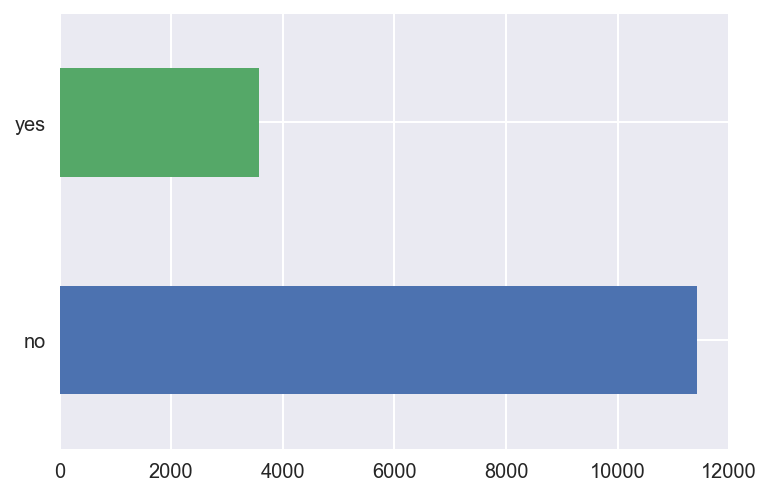

In [39]:
# How is it distributed?

# fig, ax = plt.subplots(figsize=(5, 3))
df.left.value_counts().plot('barh');

In [40]:
# How much missing data?

df.left.isnull().sum()

0

---

**Assess the features**

In [41]:
# Print datatypes

df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours     float64
time_spend_company       float64
work_accident              int64
left                      object
promotion_last_5years      int64
is_smoker                 object
department                object
salary                    object
dtype: object

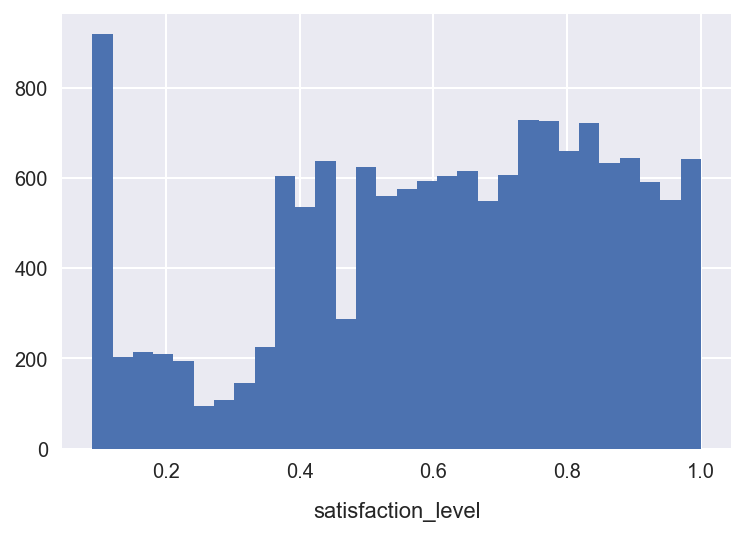

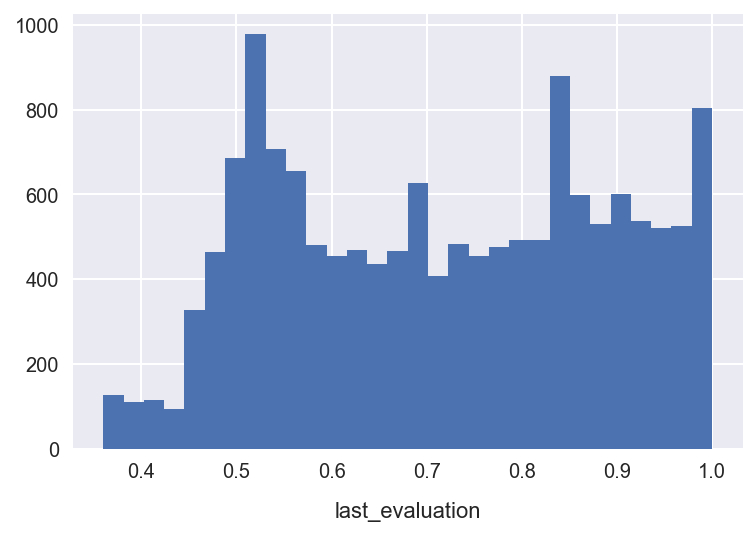

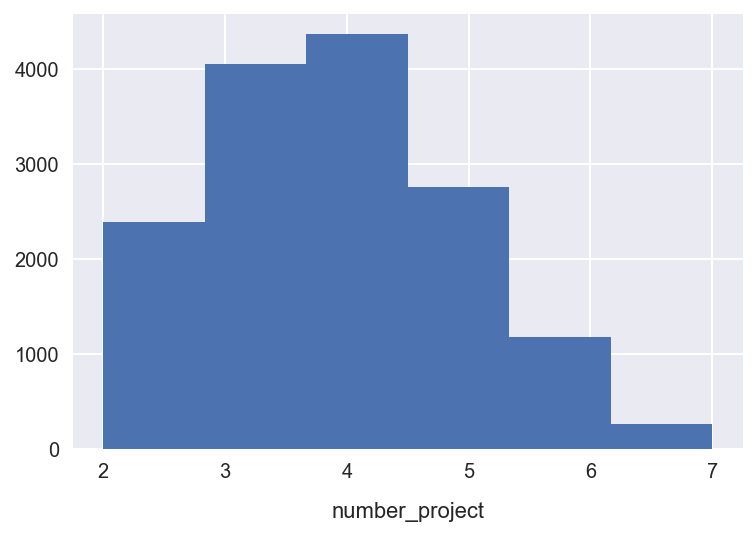

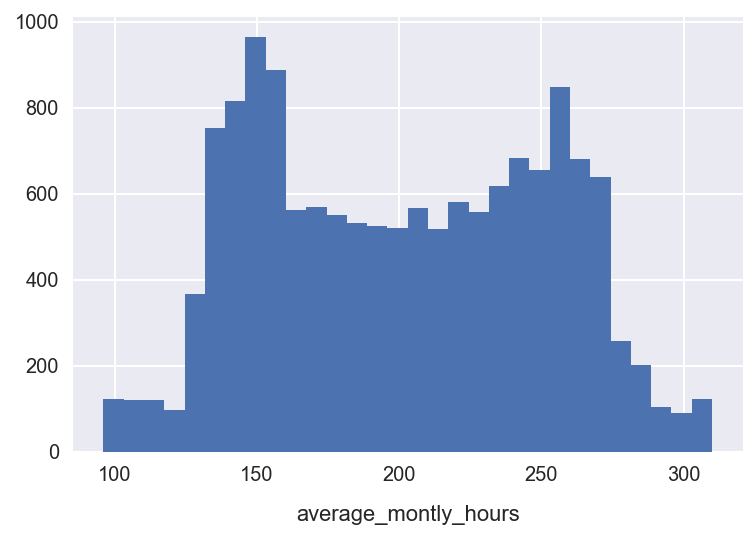

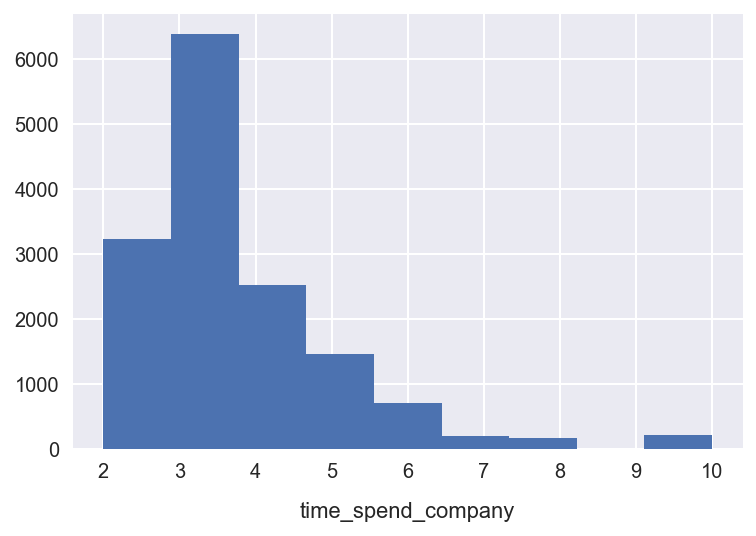

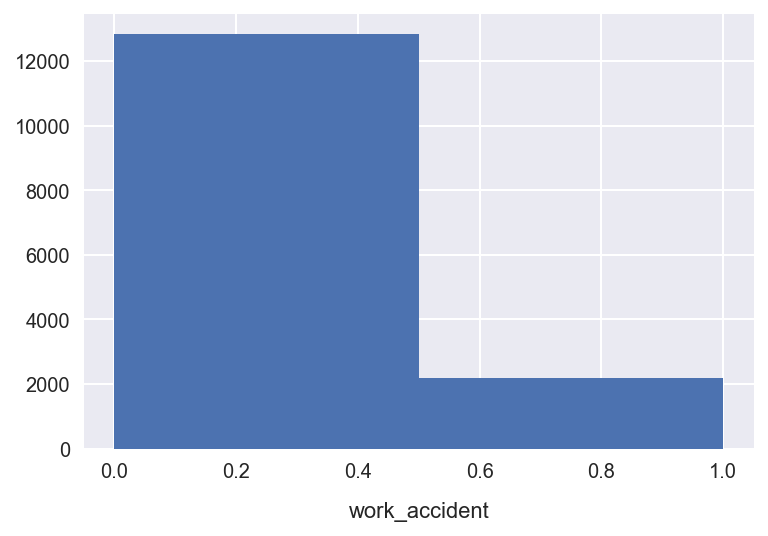

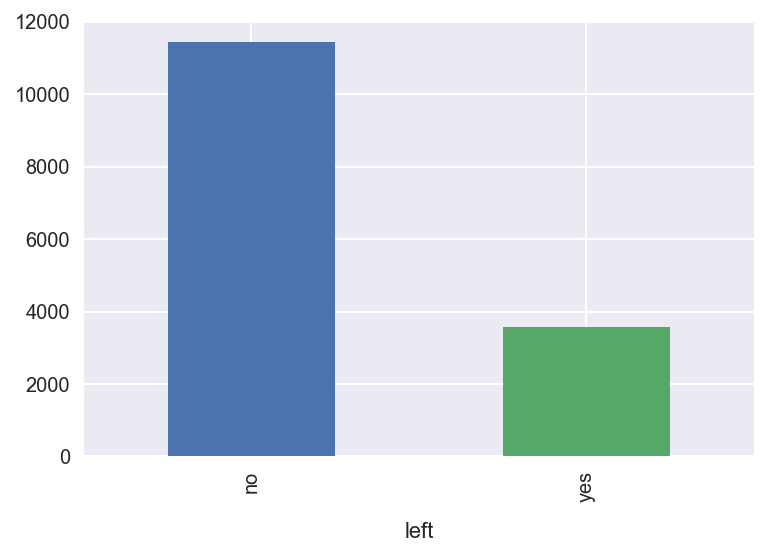

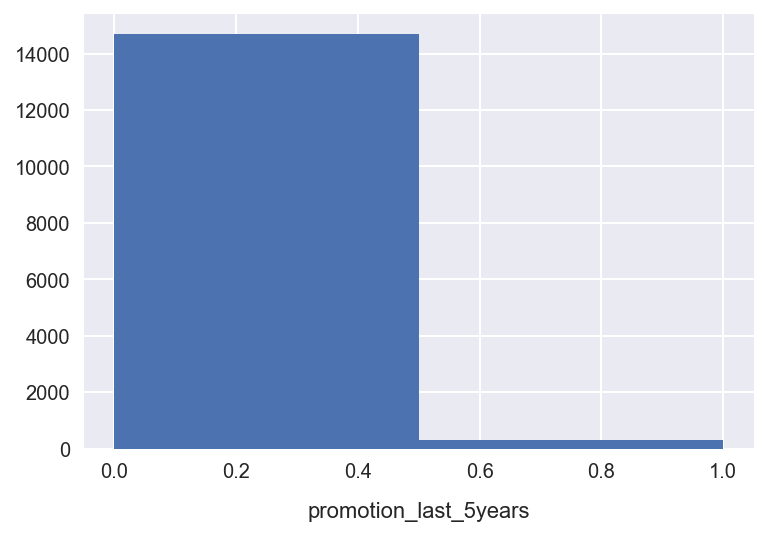

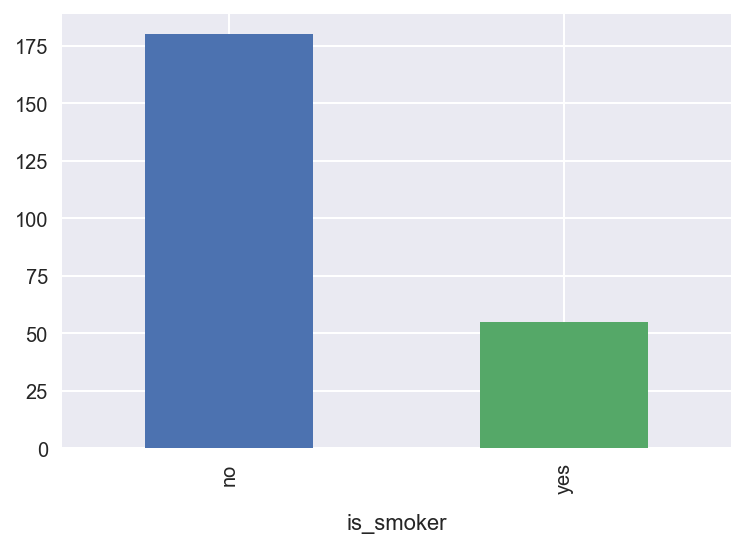

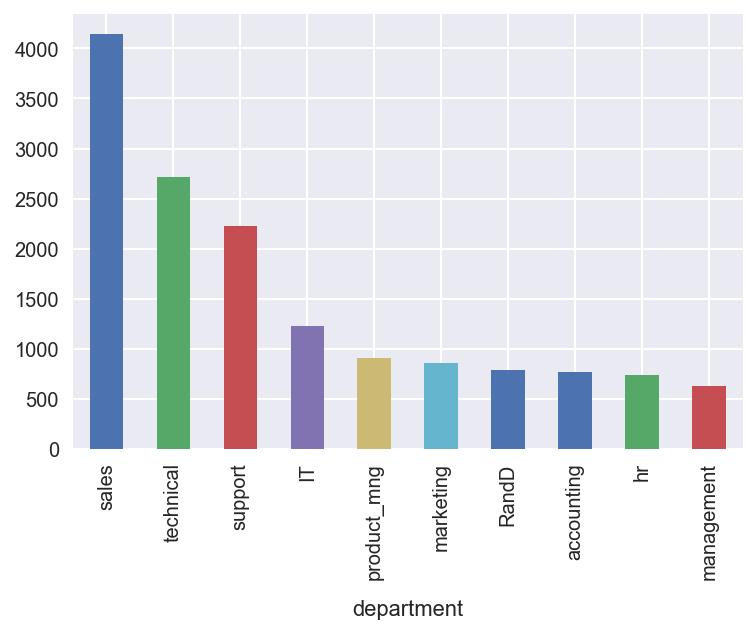

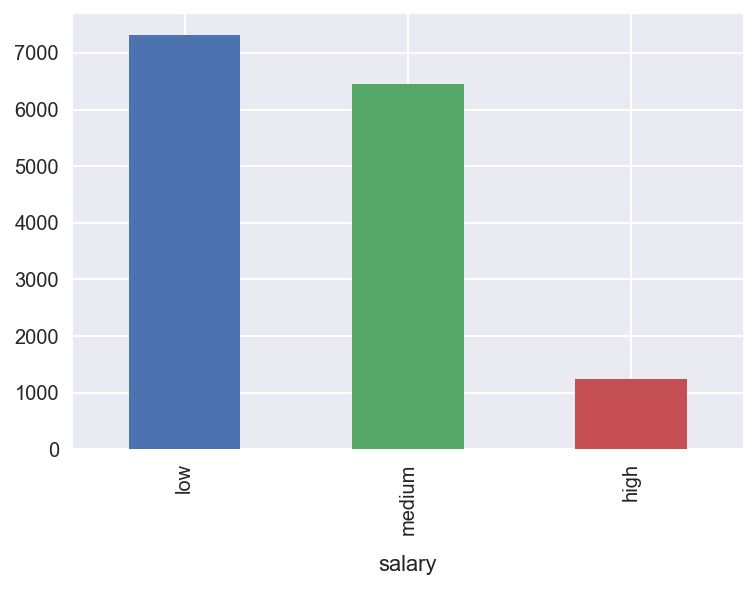

In [42]:
# Print the distibutions

for f in df.columns:
    fig = plt.figure()
    s = df[f]
    if s.dtype in ('float', 'int'):
        num_bins = min((30, len(df[f].unique())))
        s.hist(bins=num_bins)
    else:
        s.value_counts().plot.bar()    
    plt.xlabel(f)

# Old code (broken)
#
#     try:
#         fig = plt.figure()
#         num_bins = min((30, len(df[f].unique())))
#         df[f].hist(bins=num_bins)
#         plt.xlabel(f)
#     except TypeError:
#         print()
#         print(df[f].value_counts())
#         print('-'*30)
#         plt.close()

In [43]:
# How many NaNs?

df.isnull().sum() / len(df) * 100

satisfaction_level        0.000000
last_evaluation           0.000000
number_project            0.000000
average_montly_hours      2.453497
time_spend_company        1.006734
work_accident             0.000000
left                      0.000000
promotion_last_5years     0.000000
is_smoker                98.433229
department                0.000000
salary                    0.000000
dtype: float64

In [44]:
# Remove is_smoker

del df['is_smoker']

In [45]:
# Fill time_spend_company
fill_value = df.time_spend_company.median()
df.time_spend_company = df.time_spend_company.fillna(fill_value)

In [46]:
df.isnull().sum() / len(df) * 100

satisfaction_level       0.000000
last_evaluation          0.000000
number_project           0.000000
average_montly_hours     2.453497
time_spend_company       0.000000
work_accident            0.000000
left                     0.000000
promotion_last_5years    0.000000
department               0.000000
salary                   0.000000
dtype: float64

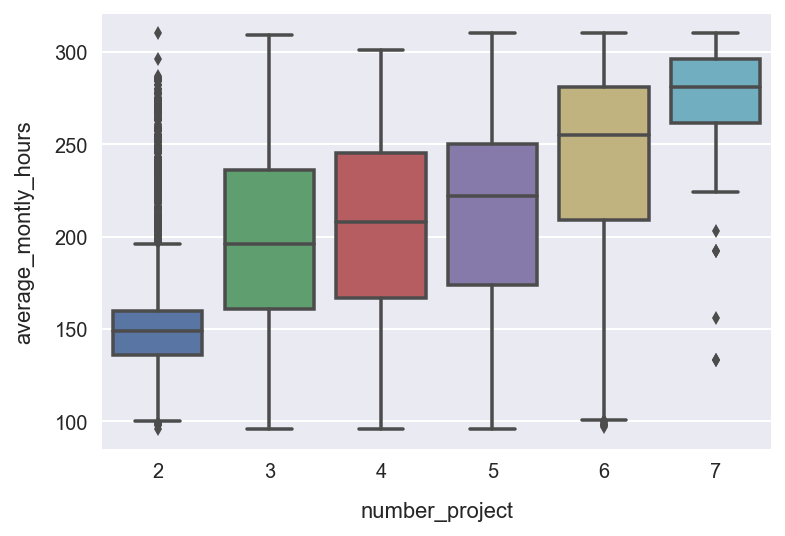

In [47]:
# How does average_montly_hours depend on number_project

sns.boxplot(x='number_project', y='average_montly_hours', data=df)
plt.savefig('../figures/lesson-2-hr-analytics-hours-num-proj-boxplot.png',
            bbox_inches='tight', dpi=300)

In [48]:
# Calculate fill values for average_montly_hours

mean_per_project = df.groupby('number_project')\
                    .average_montly_hours.mean()
mean_per_project = dict(mean_per_project)
mean_per_project

{2: 160.16353543979506,
 3: 197.47882323104236,
 4: 205.07858315740089,
 5: 211.99962839093274,
 6: 238.73947368421054,
 7: 276.015873015873}

In [49]:
fill_values = df.number_project.map(mean_per_project)

In [50]:
# Fill average_monthly_hours with the appropriate values

fill_values = df.number_project.map(mean_per_project)
df.average_montly_hours = df.average_montly_hours.fillna(fill_values)

In [51]:
# Make sure we are all clear of NaNs

assert df.isnull().sum().sum() == 0

In [52]:
# Convert categorical features to binary integer representation

df.left = df.left.map({'no': 0, 'yes': 1})
df = pd.get_dummies(df)

In [53]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [54]:
# Save to file

df.to_csv('../data/hr-analytics/hr_data_processed.csv', index=False)

---

## Topic B: Training classification models   
We train SVMs, random forests and K-nearest neighbors classification models.

---

### Subtopic A: Introduction to classification algorithms

---

In [55]:
# Set default figure size

plt.rcParams['figure.figsize'] = (8, 8)

In [56]:
# Load the processed data

df = pd.read_csv('../data/hr-analytics/hr_data_processed.csv')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


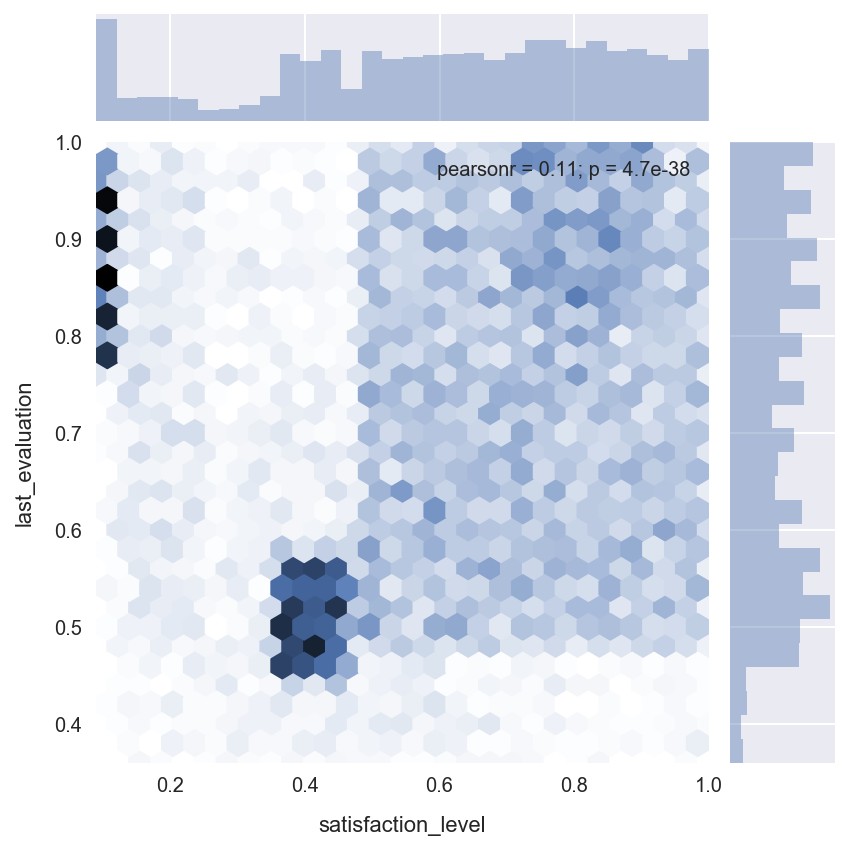

In [57]:
# The two features we'll use for training in this section

sns.jointplot('satisfaction_level', 'last_evaluation',
              data=df, kind='hex')
plt.savefig('../figures/lesson-2-hr-analytics-jointplot.png',
            bbox_inches='tight', dpi=300)

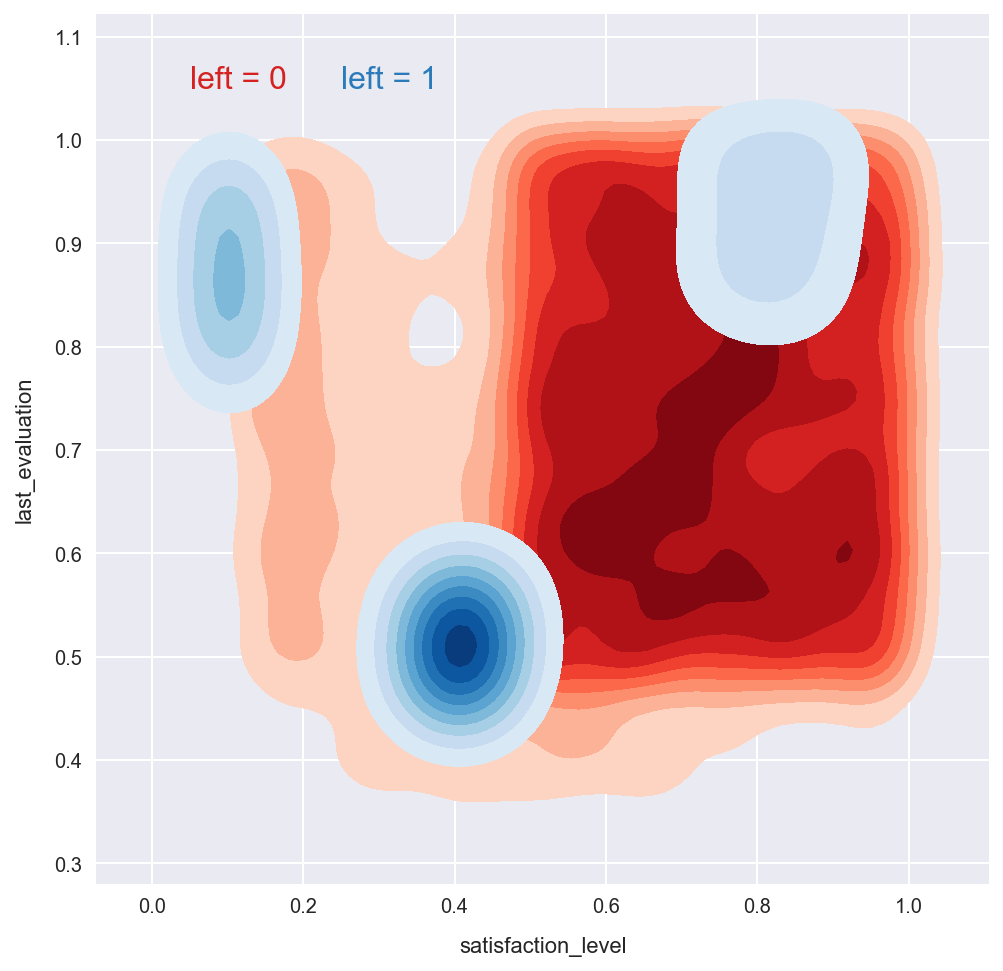

In [58]:
# Segementing by the target variable

fig, ax = plt.subplots()
plot_args = dict(shade=True, shade_lowest=False)
for i, c in zip((0, 1), ('Reds', 'Blues')):
    sns.kdeplot(df.loc[df.left==i, 'satisfaction_level'],
                df.loc[df.left==i, 'last_evaluation'],
                cmap=c, **plot_args)

ax.text(0.05, 1.05, 'left = 0', size=16, color=sns.color_palette('Reds')[-2])
ax.text(0.25, 1.05, 'left = 1', size=16, color=sns.color_palette('Blues')[-2])
plt.savefig('../figures/lesson-2-hr-analytics-bivariate-segmented.png',
            bbox_inches='tight', dpi=300)

In [59]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

features = ['satisfaction_level', 'last_evaluation']
X_train, X_test, y_train, y_test = train_test_split(
    df[features].values, df['left'].values,
    test_size=0.3, random_state=1)

In [60]:
# Scale the data for SVMs and K-Nearest Neighbors

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [61]:
# Train a support vector machine classifier

from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train_std, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [62]:
# What is the classification accuracy?

from sklearn.metrics import accuracy_score

y_pred = svm.predict(X_test_std)
acc = accuracy_score(y_test, y_pred)
print('accuracy = {:.1f}%'.format(acc*100))

accuracy = 75.9%


In [63]:
# What is the accuracy by class?

from sklearn.metrics import confusion_matrix

print('percent accuracy score per class:')
cmat = confusion_matrix(y_test, y_pred)
scores = cmat.diagonal() / cmat.sum(axis=1) * 100
print('left = 0 : {:.2f}%'.format(scores[0]))
print('left = 1 : {:.2f}%'.format(scores[1]))

percent accuracy score per class:
left = 0 : 100.00%
left = 1 : 0.00%


/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


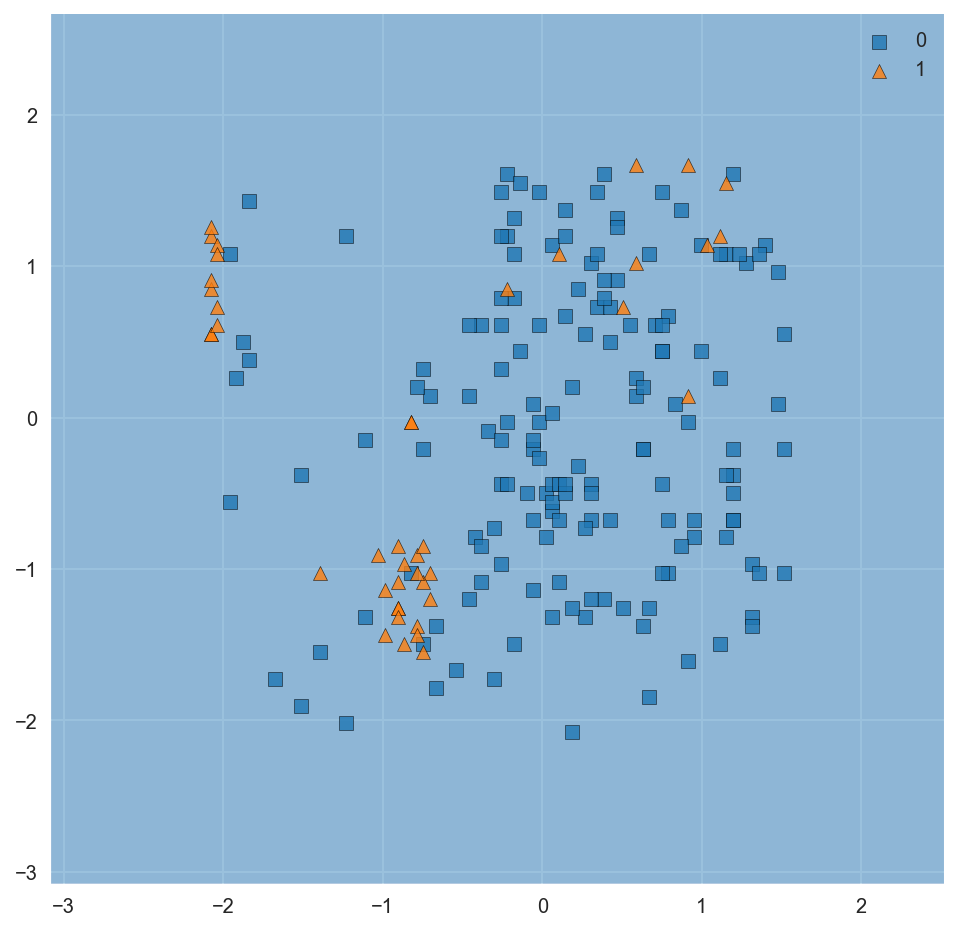

In [64]:
# Plot the resulting decision regions

from mlxtend.plotting import plot_decision_regions

N_samples = 200
X, y = X_train_std[:N_samples], y_train[:N_samples]
plot_decision_regions(X, y, clf=svm);

In [65]:
# The docstring for scikit-learn's SVM

SVC?

In [66]:
# Train a kernel SVM

svm = SVC(kernel='rbf', C=1, random_state=1)
svm.fit(X_train_std, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from IPython.display import display
from mlxtend.plotting import plot_decision_regions

def check_model_fit(clf, X_test, y_test):
    # Print overall test-set accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred, normalize=True) * 100
    print('total accuracy = {:.1f}%'.format(acc))
    
    # Print confusion matrix
    cmat = confusion_matrix(y_test, y_pred)
    cols = pd.MultiIndex.from_tuples([('predictions', 0), ('predictions', 1)])
    indx = pd.MultiIndex.from_tuples([('actual', 0), ('actual', 1)])
    display(pd.DataFrame(cmat, columns=cols, index=indx))
    print()
    
    # Print test-set accuracy grouped by the target variable 
    print('percent accuracy score per class:')
    cmat = confusion_matrix(y_test, y_pred)
    scores = cmat.diagonal() / cmat.sum(axis=1) * 100
    print('left = 0 : {:.2f}%'.format(scores[0]))
    print('left = 1 : {:.2f}%'.format(scores[1]))
    print()
    
    # Plot decision regions
    fig = plt.figure(figsize=(8, 8))
    N_samples = 200
    X, y = X_test[:N_samples], y_test[:N_samples]
    plot_decision_regions(X, y, clf=clf)
    
    plt.xlabel('satisfaction_level')
    plt.ylabel('last_evaluation')
    plt.legend(loc='upper left')

total accuracy = 89.7%


predictions     
                   0    1
actual 0        3308  108
       1         354  730


percent accuracy score per class:
left = 0 : 96.84%
left = 1 : 67.34%



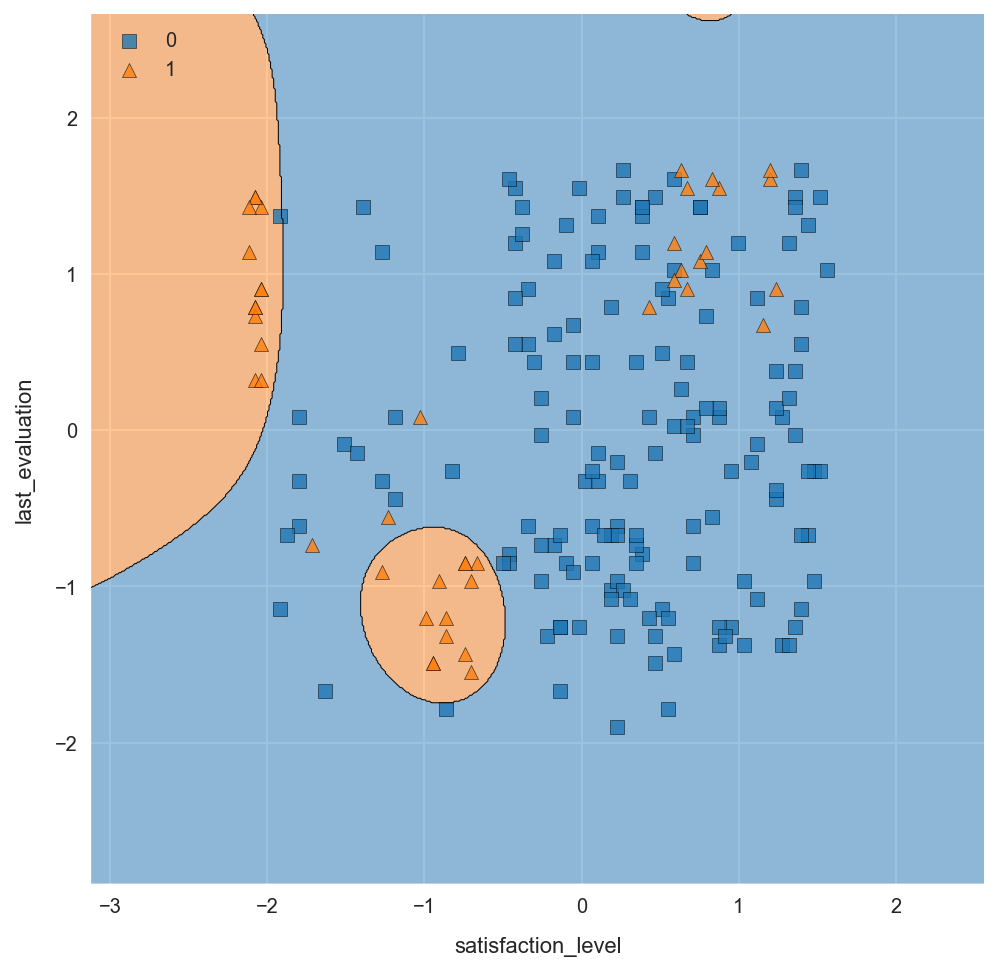

In [68]:
check_model_fit(svm, X_test_std, y_test)
plt.savefig('../figures/lesson-2-hr-analytics-svm.png',
            bbox_inches='tight', dpi=300)

In [69]:
# Load the K-Nearest Neighbors class

from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier?

total accuracy = 90.9%


predictions     
                   0    1
actual 0        3203  213
       1         198  886


percent accuracy score per class:
left = 0 : 93.76%
left = 1 : 81.73%



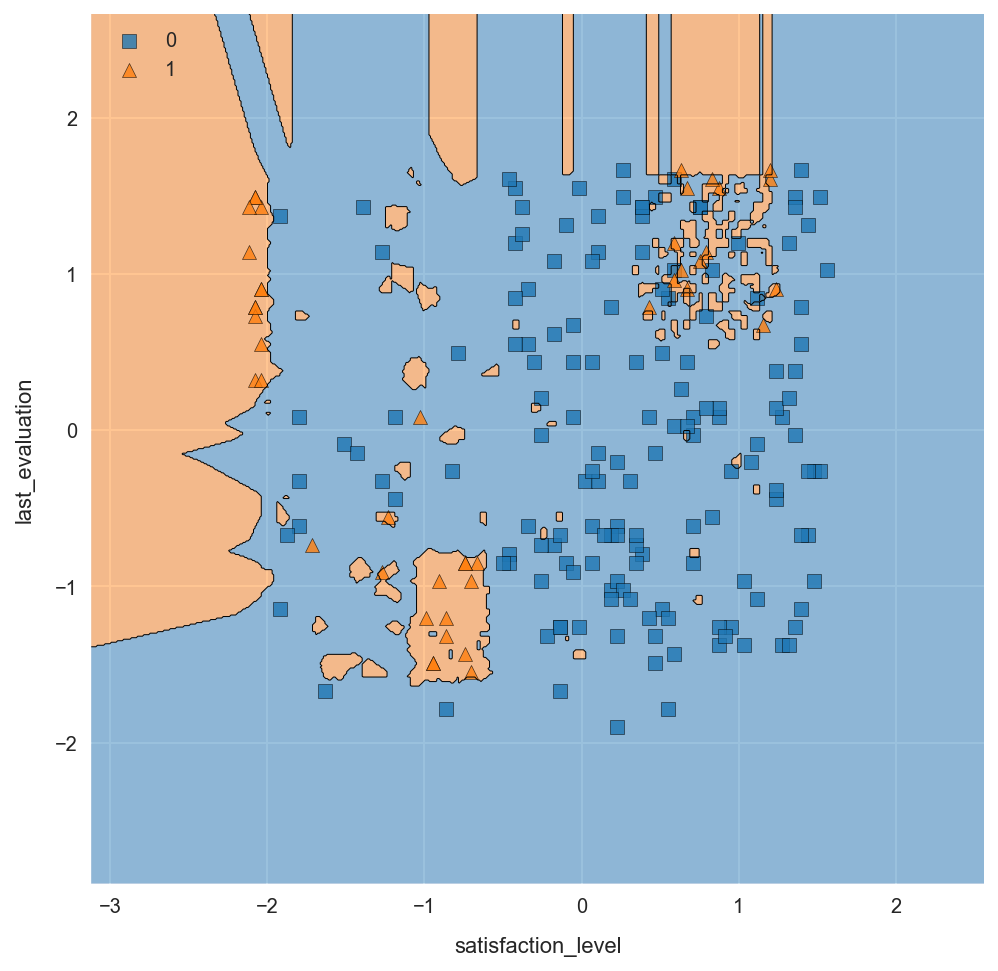

In [70]:
# Train a K-Nearest Neighbors model

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)

check_model_fit(knn, X_test_std, y_test)
plt.savefig('../figures/lesson-2-hr-analytics-knn-overfit.png',
            bbox_inches='tight', dpi=300)

total accuracy = 91.6%


predictions     
                   0    1
actual 0        3290  126
       1         254  830


percent accuracy score per class:
left = 0 : 96.31%
left = 1 : 76.57%



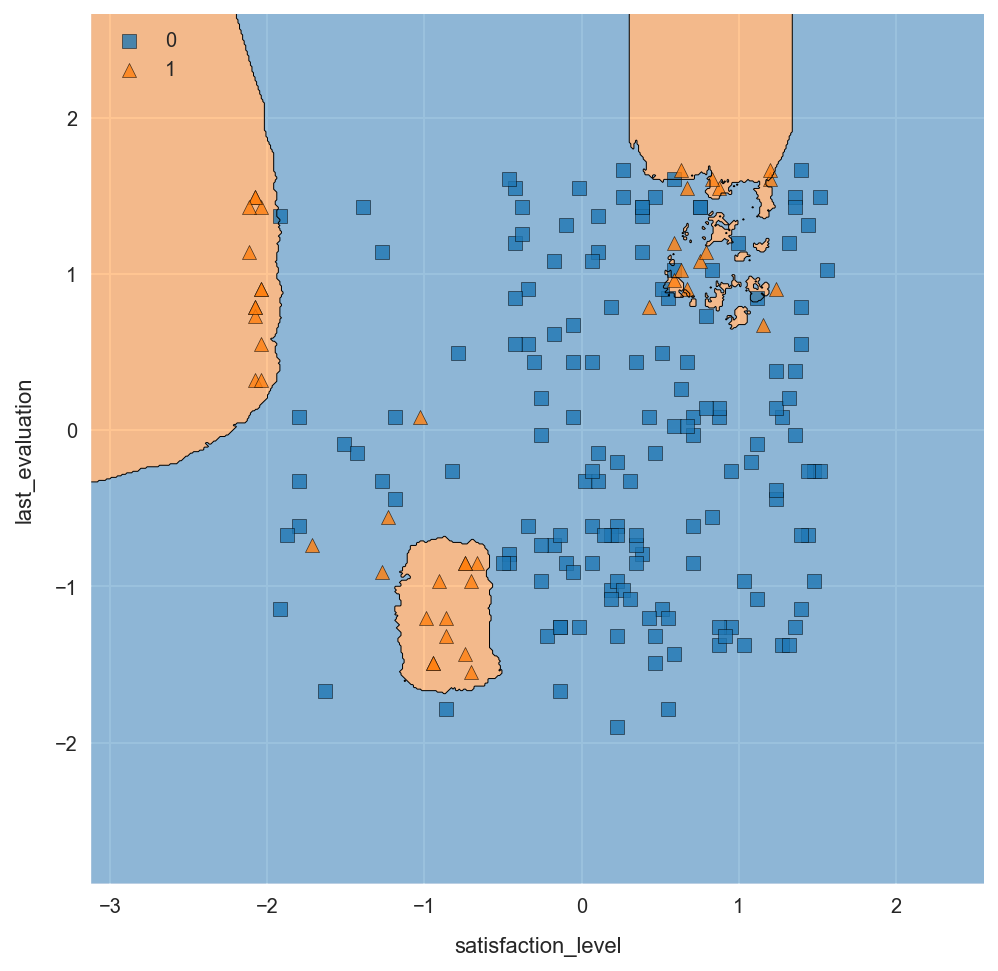

In [71]:
# Increase the number of "nearest neighbors" to reduce overfitting

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train_std, y_train)

check_model_fit(knn, X_test_std, y_test)
plt.savefig('../figures/lesson-2-hr-analytics-knn.png',
            bbox_inches='tight', dpi=300)

In [72]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier?

total accuracy = 92.0%


predictions     
                   0    1
actual 0        3371   45
       1         317  767


percent accuracy score per class:
left = 0 : 98.68%
left = 1 : 70.76%



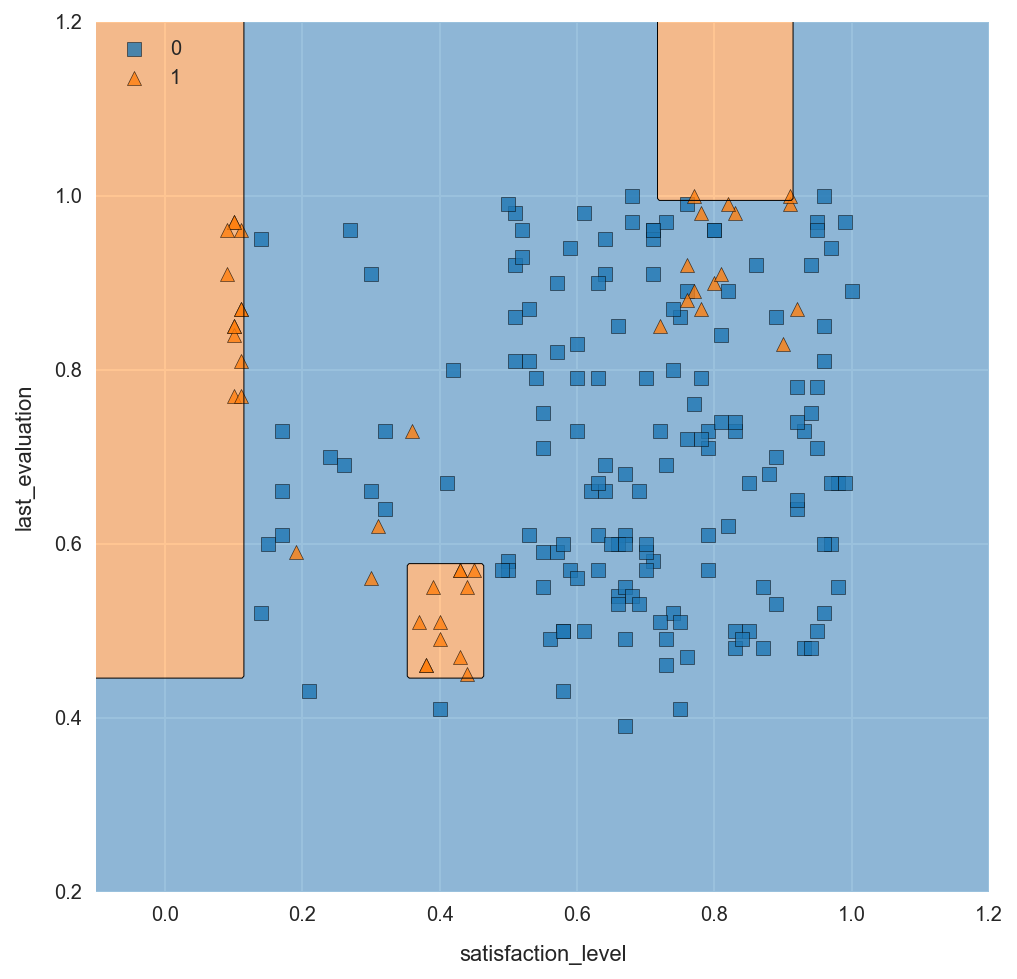

In [73]:
# Train a Random Forest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50, max_depth=5,
                                random_state=1)
forest.fit(X_train, y_train)

check_model_fit(forest, X_test, y_test)
plt.xlim(-0.1, 1.2)
plt.ylim(0.2, 1.2)
plt.savefig('../figures/lesson-2-hr-analytics-forest.png',
            bbox_inches='tight', dpi=300)

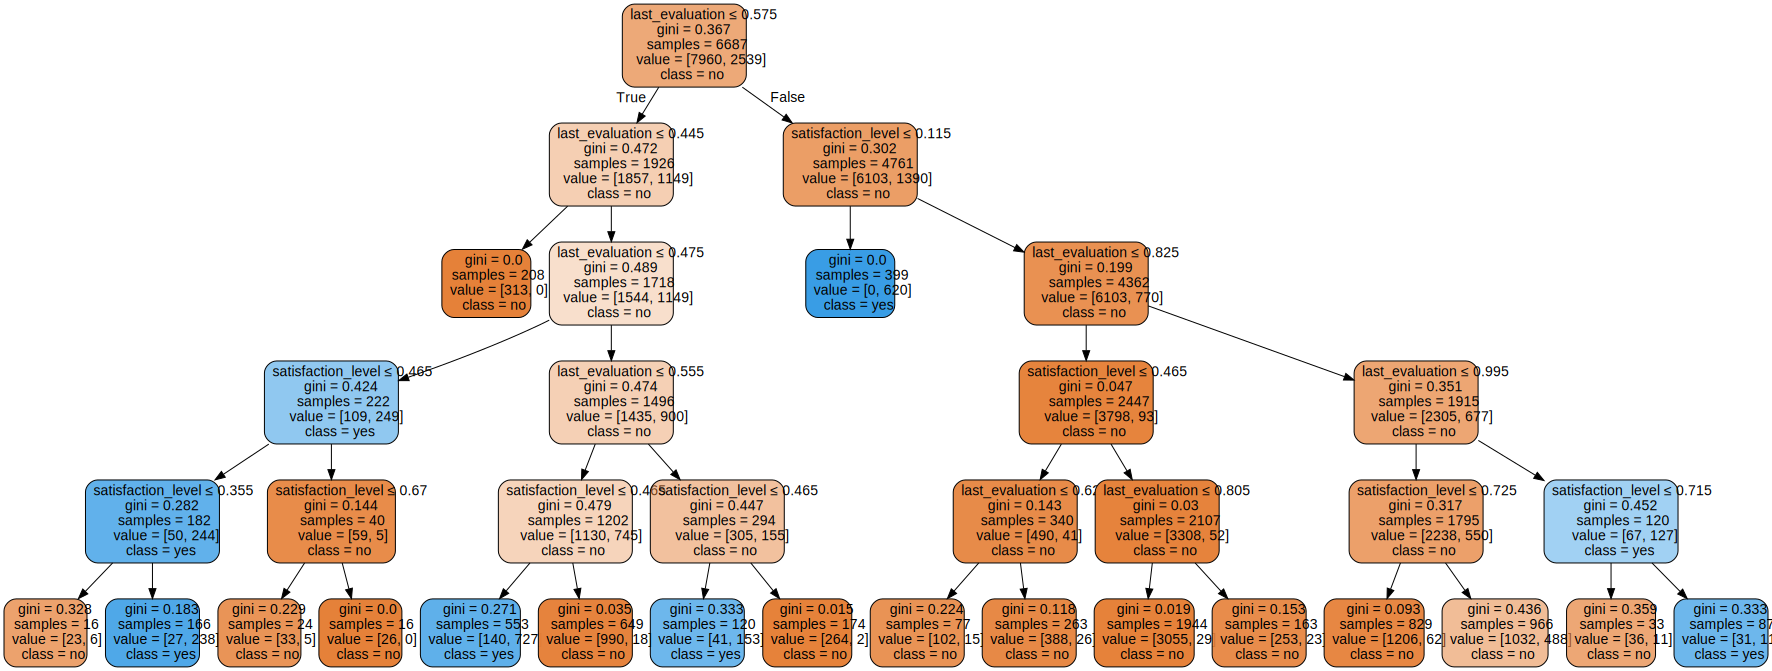

In [74]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
                forest.estimators_[0],
                out_file=None, 
                feature_names=features,  
                class_names=['no', 'yes'],  
                filled=True, rounded=True,  
                special_characters=True)
graph = graphviz.Source(dot_data)
graph

---

### Subtopic B: K-fold cross validation and validation curves

---

In [75]:
# Load the processed data and select training/validation set

df = pd.read_csv('../data/hr-analytics/hr_data_processed.csv')

features = ['satisfaction_level', 'last_evaluation']
X = df[features].values
y = df.left.values

In [76]:
# Instantiate the model

clf = RandomForestClassifier(n_estimators=100, max_depth=5)

In [77]:
# Stratified k-fold cross validation

from sklearn.model_selection import cross_val_score

np.random.seed(1)
scores = cross_val_score(
            estimator=clf,
            X=X,
            y=y,
            cv=10)

print('accuracy = {:.3f} +/- {:.3f}'.format(scores.mean(), scores.std()))

accuracy = 0.923 +/- 0.005


In [78]:
# Custom function for class accuracies

from sklearn.model_selection import StratifiedKFold

def cross_val_class_score(clf, X, y, cv=10):
    kfold = StratifiedKFold(n_splits=cv)\
                .split(X, y)

    class_accuracy = []
    for k, (train, test) in enumerate(kfold):
        clf.fit(X[train], y[train])
        y_test = y[test]
        y_pred = clf.predict(X[test])
        cmat = confusion_matrix(y_test, y_pred)
        class_acc = cmat.diagonal()/cmat.sum(axis=1)
        class_accuracy.append(class_acc)
        print('fold: {:d} accuracy: {:s}'.format(k+1, str(class_acc)))
        
    return np.array(class_accuracy)

In [79]:
# Stratified k-fold cross validation

np.random.seed(1)
scores = cross_val_class_score(clf, X, y)

print('accuracy = {} +/- {}'.format(scores.mean(axis=0), scores.std(axis=0)))

fold: 1 accuracy: [0.99125109 0.75139665]
fold: 2 accuracy: [0.98950131 0.67787115]
fold: 3 accuracy: [0.98950131 0.70868347]
fold: 4 accuracy: [0.98600175 0.70308123]
fold: 5 accuracy: [0.98512686 0.71708683]
fold: 6 accuracy: [0.9816273  0.75910364]
fold: 7 accuracy: [0.98862642 0.69747899]
fold: 8 accuracy: [0.9816273  0.72268908]
fold: 9 accuracy: [0.99036778 0.72829132]
fold: 10 accuracy: [0.98861646 0.70588235]
accuracy = [0.98722476 0.71715647] +/- [0.00330026 0.02326823]


In [80]:
# Calcualte a validation curve

from sklearn.model_selection import validation_curve

clf = RandomForestClassifier(n_estimators=10)
max_depths = np.arange(3, 16, 3)

train_scores, test_scores = validation_curve(
            estimator=clf,
            X=X,
            y=y,
            param_name='max_depth',
            param_range=max_depths,
            cv=10);

In [81]:
# Function to draw the validation curve

def plot_validation_curve(train_scores, test_scores,
                          param_range, xlabel='', log=False):
    '''
    This code is from scikit-learn docs:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
    
    Also here:
    https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch06/ch06.ipynb
    '''
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    fig = plt.figure()
    
    plt.plot(param_range, train_mean, 
             color=sns.color_palette('Set1')[1], marker='o', 
             markersize=5, label='training accuracy')

    plt.fill_between(param_range, train_mean + train_std,
                     train_mean - train_std, alpha=0.15,
                     color=sns.color_palette('Set1')[1])

    plt.plot(param_range, test_mean, 
             color=sns.color_palette('Set1')[0], linestyle='--', 
             marker='s', markersize=5, 
             label='validation accuracy')

    plt.fill_between(param_range, 
                     test_mean + test_std,
                     test_mean - test_std, 
                     alpha=0.15, color=sns.color_palette('Set1')[0])

    if log:
        plt.xscale('log')
    plt.legend(loc='lower right')
    if xlabel:
        plt.xlabel(xlabel)
    plt.ylabel('Accuracy')
    plt.ylim(0.9, 1.0)
    return fig

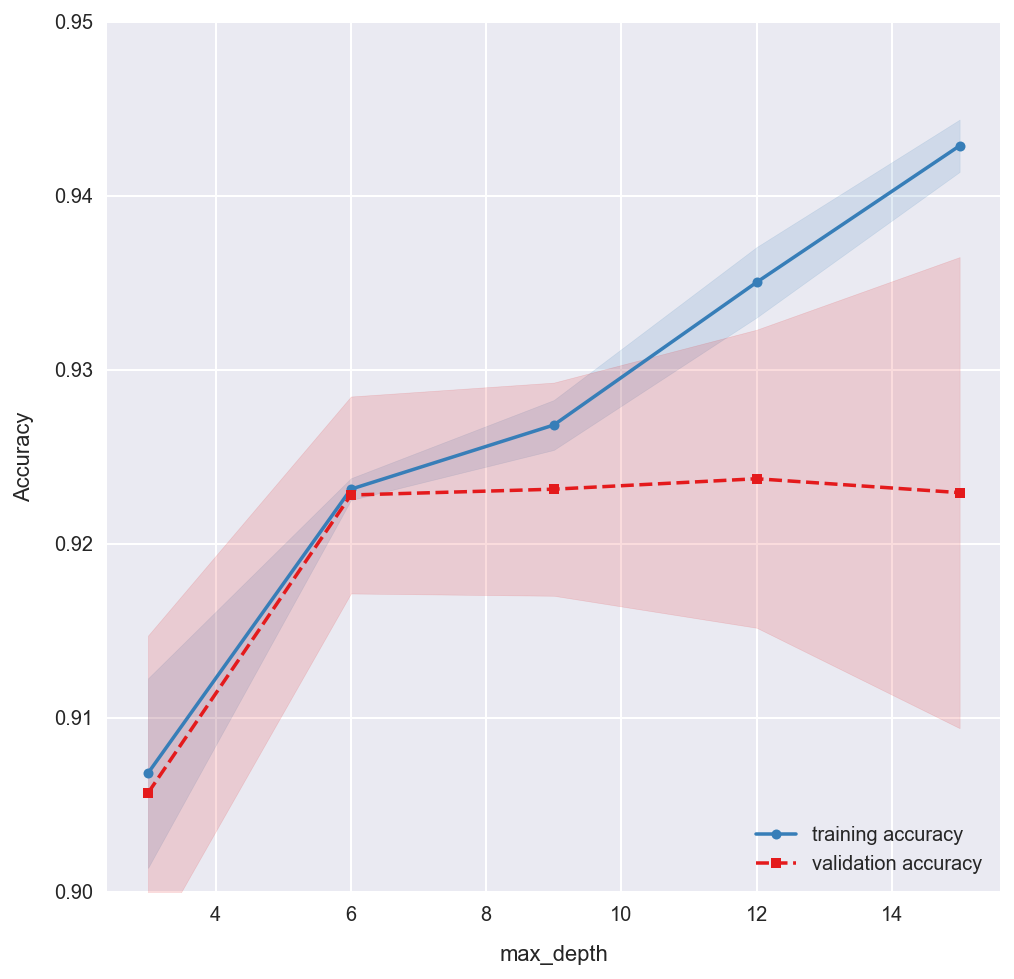

In [82]:
plot_validation_curve(train_scores, test_scores,
                      max_depths, xlabel='max_depth')
plt.ylim(0.9, 0.95)
plt.savefig('../figures/lesson-2-hr-analytics-validation-curve.png',
            bbox_inches='tight', dpi=300)

---

### Activity B: Training a predictive model for the employee retention problem

---

In [83]:
# Load the processed data

df = pd.read_csv('../data/hr-analytics/hr_data_processed.csv')
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [84]:
# Select training/validation set

features = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium']

X = df[features].values
y = df.left.values

In [85]:
%%time
# Calculate a validation curve for max_depth
# using a Random Forest classifier

np.random.seed(1)
clf = RandomForestClassifier(n_estimators=20)
max_depths = [3, 4, 5, 6, 7,
              9, 12, 15, 18, 21]
print('Training {} models ...'.format(len(max_depths)))
train_scores, test_scores = validation_curve(
            estimator=clf,
            X=X,
            y=y,
            param_name='max_depth',
            param_range=max_depths,
            cv=5);

Training 10 models ...
CPU times: user 7.11 s, sys: 39 ms, total: 7.15 s
Wall time: 7.18 s


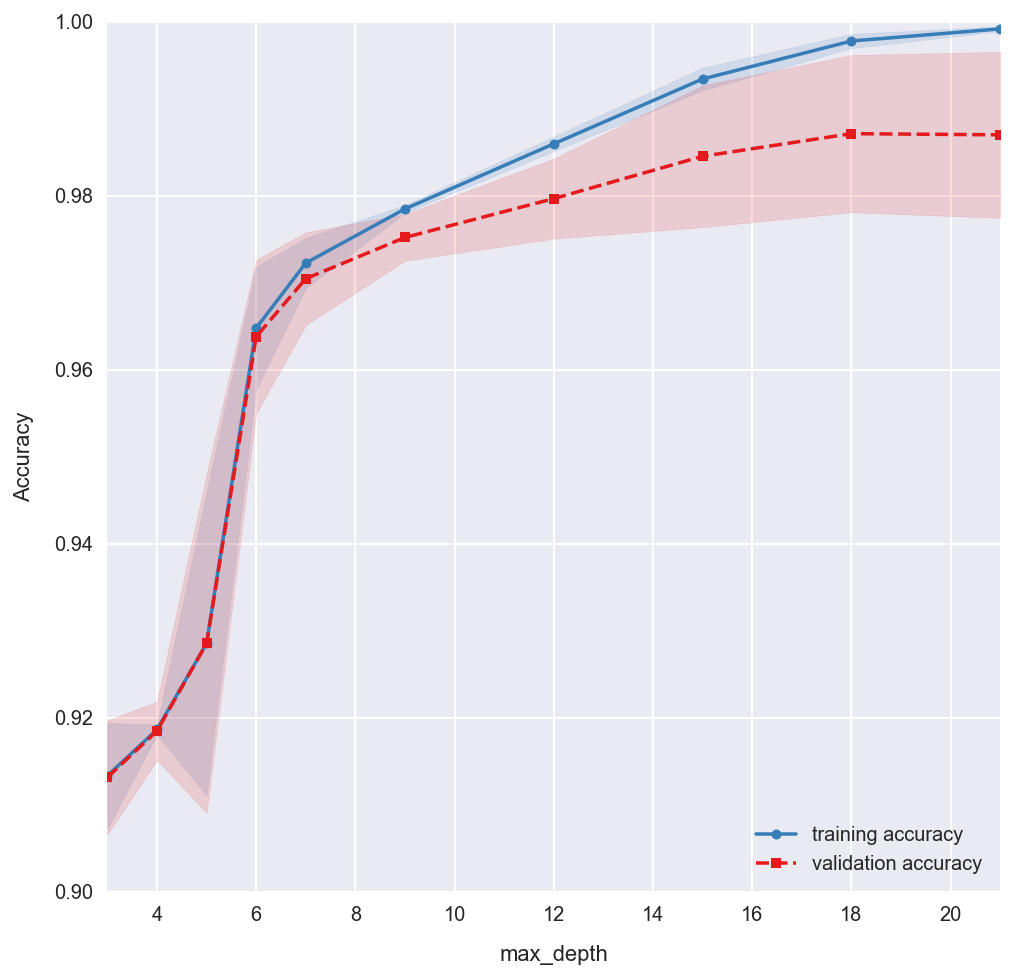

In [86]:
# Draw the validation curve

plot_validation_curve(train_scores, test_scores,
                      max_depths, xlabel='max_depth')
plt.xlim(3, 21)
plt.savefig('../figures/lesson-2-hr-analytics-full-max-depth-val.png.png',
            bbox_inches='tight', dpi=300)

In [87]:
# Show k-fold results for the selected model:
# a random forest with max_depth = 6 and n_estimators = 200

np.random.seed(1)
clf = RandomForestClassifier(n_estimators=200, max_depth=6)
scores = cross_val_class_score(clf, X, y)

print('accuracy = {} +/- {}'.format(scores.mean(axis=0), scores.std(axis=0)))

fold: 1 accuracy: [0.99825022 0.88826816]
fold: 2 accuracy: [0.99825022 0.84033613]
fold: 3 accuracy: [0.99387577 0.81232493]
fold: 4 accuracy: [0.99300087 0.85154062]
fold: 5 accuracy: [0.99475066 0.82633053]
fold: 6 accuracy: [0.99387577 0.85994398]
fold: 7 accuracy: [0.99650044 0.87394958]
fold: 8 accuracy: [0.99650044 0.83473389]
fold: 9 accuracy: [0.99474606 0.87394958]
fold: 10 accuracy: [0.99562172 0.89635854]
accuracy = [0.99553722 0.85577359] +/- [0.00172575 0.02614334]


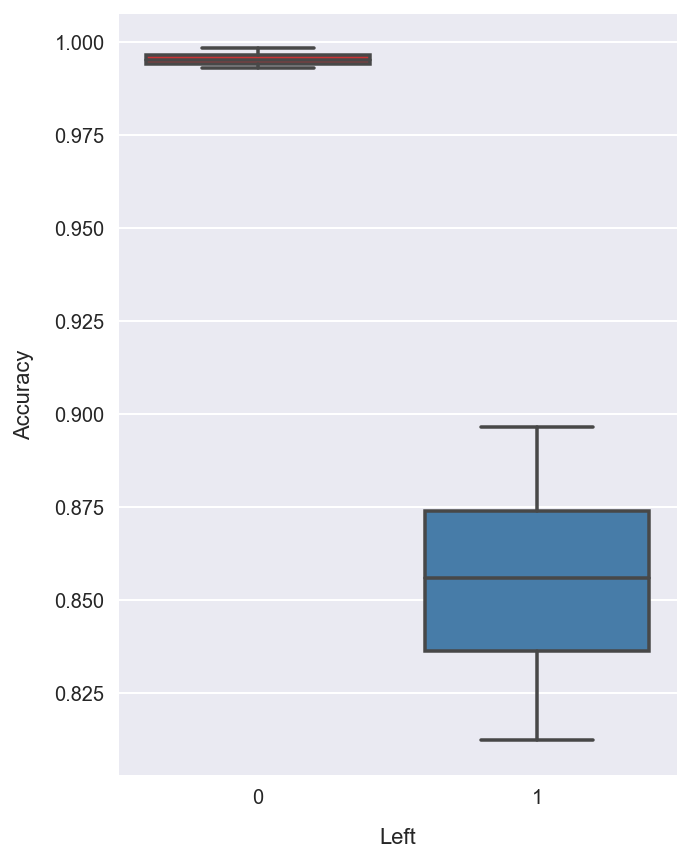

In [88]:
# Box plot of result

fig = plt.figure(figsize=(5, 7))
sns.boxplot(data=pd.DataFrame(scores, columns=[0, 1]),
            palette=sns.color_palette('Set1'))
plt.xlabel('Left')
plt.ylabel('Accuracy')
plt.savefig('../figures/lesson-2-hr-analytics-full-acc-1.png',
            bbox_inches='tight', dpi=300)

In [89]:
# Access feature importances

d = (clf.feature_importances_, df.columns)
list(zip(*d))

[(0.36430881606946935, 'satisfaction_level'),
 (0.10606469651847085, 'last_evaluation'),
 (0.19088737947190054, 'number_project'),
 (0.13082595880187356, 'average_montly_hours'),
 (0.17955451160561237, 'time_spend_company'),
 (0.012101773234080513, 'work_accident'),
 (0.0008113047024873478, 'left'),
 (0.0002106254296221101, 'promotion_last_5years'),
 (0.0007764987335924035, 'department_IT'),
 (0.00022487937663401313, 'department_RandD'),
 (0.0004379436382607986, 'department_accounting'),
 (0.0003198048153939095, 'department_hr'),
 (0.00011370864098983321, 'department_management'),
 (0.00015365441067812497, 'department_marketing'),
 (0.00031929963267123197, 'department_product_mng'),
 (0.00036881031257490304, 'department_sales'),
 (0.0003908279047738095, 'department_support'),
 (0.005001316151254855, 'department_technical'),
 (0.005775253267745778, 'salary_high'),
 (0.0013529372819138833, 'salary_low')]

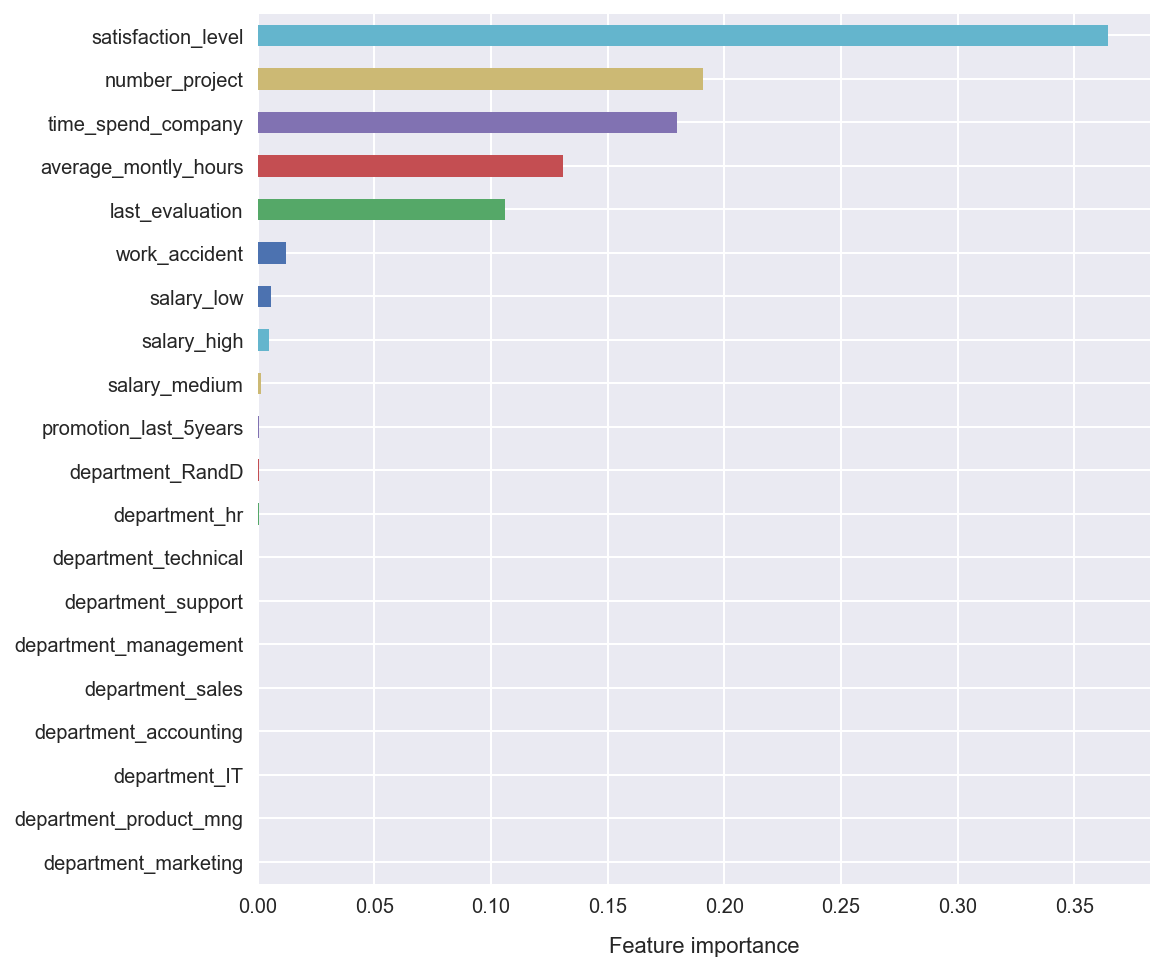

In [90]:
# Visualize the feature importances

pd.Series(clf.feature_importances_, name='Feature importance',
            index=df[features].columns)\
    .sort_values()\
    .plot.barh()
plt.xlabel('Feature importance')
plt.savefig('../figures/lesson-2-hr-analytics-full-feature-importance-1.png',
            bbox_inches='tight', dpi=300)

In [91]:
# Print all the features with low importance

importances = list(pd.Series(clf.feature_importances_, index=df[features].columns)\
        .sort_values(ascending=False).index)

np.array(importances[5:])

array(['work_accident', 'salary_low', 'salary_high', 'salary_medium',
       'promotion_last_5years', 'department_RandD', 'department_hr',
       'department_technical', 'department_support',
       'department_management', 'department_sales',
       'department_accounting', 'department_IT', 'department_product_mng',
       'department_marketing'], dtype='<U22')

In [92]:
# Reducte the one-hot-encoded features with PCA

from sklearn.decomposition import PCA

pca_features = ['work_accident', 'salary_low', 'salary_high', 'salary_medium',
       'promotion_last_5years', 'department_RandD', 'department_hr',
       'department_technical', 'department_support',
       'department_management', 'department_sales',
       'department_accounting', 'department_IT', 'department_product_mng',
       'department_marketing']

X_reduce = df[pca_features]

pca = PCA(n_components=3)
pca.fit(X_reduce)
X_pca = pca.transform(X_reduce)

In [93]:
# Add principal components to df

df['first_principle_component'] = X_pca.T[0]
df['second_principle_component'] = X_pca.T[1]
df['third_principle_component'] = X_pca.T[2]

In [94]:
# Select reduced-dimension feature set

features = ['satisfaction_level', 'number_project', 'time_spend_company',
            'average_montly_hours', 'last_evaluation',
            'first_principle_component',
            'second_principle_component',
            'third_principle_component']

X = df[features].values
y = df.left.values

In [95]:
# Show k-fold results for the selected model with reduced dimensionality:
# a random forest with max_depth = 6 and n_estimators = 200

np.random.seed(1)
clf = RandomForestClassifier(n_estimators=200, max_depth=6)
scores = cross_val_class_score(clf, X, y)

print('accuracy = {} +/- {}'.format(scores.mean(axis=0), scores.std(axis=0)))

fold: 1 accuracy: [0.99825022 0.91620112]
fold: 2 accuracy: [0.99825022 0.87955182]
fold: 3 accuracy: [0.99650044 0.9047619 ]
fold: 4 accuracy: [0.99300087 0.91036415]
fold: 5 accuracy: [0.99387577 0.8907563 ]
fold: 6 accuracy: [0.99562555 0.90756303]
fold: 7 accuracy: [0.99650044 0.92717087]
fold: 8 accuracy: [0.99475066 0.89355742]
fold: 9 accuracy: [0.99474606 0.91596639]
fold: 10 accuracy: [0.99474606 0.91596639]
accuracy = [0.99562463 0.90618594] +/- [0.00166047 0.01363927]


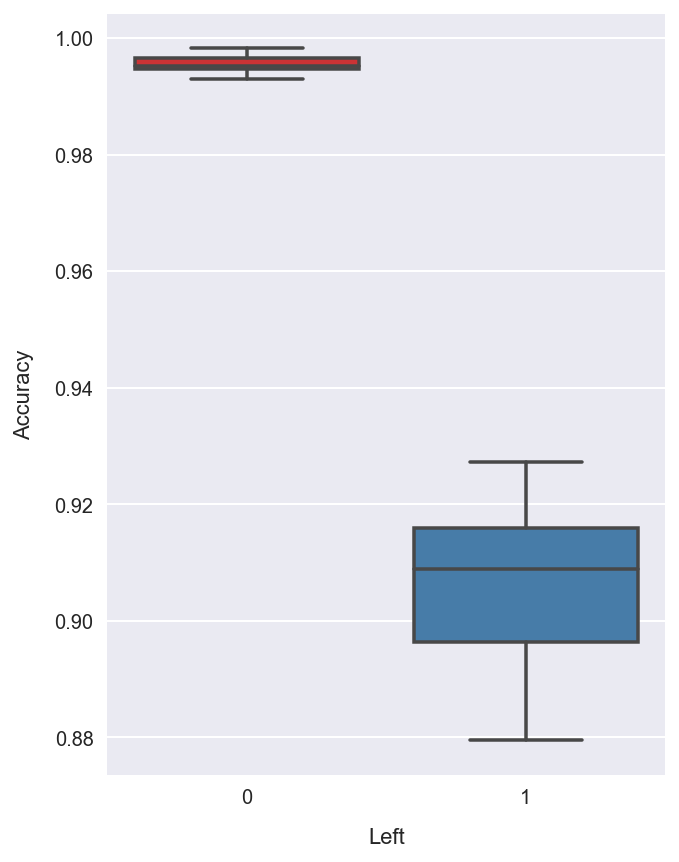

In [96]:
# Box plot of result

fig = plt.figure(figsize=(5, 7))
sns.boxplot(data=pd.DataFrame(scores, columns=[0, 1]),
            palette=sns.color_palette('Set1'))
plt.xlabel('Left')
plt.ylabel('Accuracy')
plt.savefig('../figures/lesson-2-hr-analytics-full-acc-2.png',
            bbox_inches='tight', dpi=300)

In [97]:
# Train the final model on all the samples

np.random.seed(1)
clf = RandomForestClassifier(n_estimators=200, max_depth=6)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
# Save the model

from sklearn.externals import joblib
joblib.dump(clf, 'random-forest-trained.pkl')

['random-forest-trained.pkl']

In [99]:
# Check that it saved to the working directory

!ls 

lesson-2-workbook.html    lesson-2-workbook.ipynb   random-forest-trained.pkl


In [100]:
# Load model from pkl file

clf = joblib.load('random-forest-trained.pkl')
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [101]:
# Example of using the model for a specific employee

sandra = df.iloc[573]
X = sandra[features]
X

satisfaction_level              0.360000
number_project                  2.000000
time_spend_company              3.000000
average_montly_hours          148.000000
last_evaluation                 0.470000
first_principle_component       0.742801
second_principle_component     -0.514568
third_principle_component      -0.677421
Name: 573, dtype: float64

In [102]:
# Predict the class label for Sandra

clf.predict([list(X.values)])

array([1])

In [103]:
# Predict the probability of class labels for Sandra

clf.predict_proba([X])

array([[0.06576239, 0.93423761]])

In [104]:
# What if we reduce her number of hours and time spent at the company?

X.average_montly_hours = 100
X.time_spend_company = 1
clf.predict_proba([X])

array([[0.61070329, 0.38929671]])

In [105]:
clf.predict([X])

array([0])